<a href="https://colab.research.google.com/github/Vishwanath200310/HR-Employee-Attrition-Project/blob/main/HR_Employee_Attrition_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem** **Definition**

Recruting new employee for any company is very hectic and it also leads to spend lots of money to recrute a new employee.Also new employee need to be trained for such period to gain experience in the company that makes the HR team more inconvience on retaining the current employee and facing challenges in recruting new employees.

# **Solution**

The solution for this apporach we have the dataset given by HR team which consists of variable such as Employee's education,environment satisfaction,job involvement,job statisfaction,performance rating etc.So,we need to build a model which predicts whether that particular employee is happy with his/her work and has the probability of work within the company itself.That makes the HR make easy to understand the employee's attitude towards the company and the overall work culture in the organization that eventually help the HR team to resolve any issue regarding employee's satisfaction towards the company.

# **Importing Libraries and dataset**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [27]:
dataset = pd.read_csv('/content/sample_data/WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [28]:
dataset

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [17]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [18]:
dataset.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


# **Data Visualization**

In [29]:
# replace Yes/NO with 1s and 0s
dataset['Attrition'] = dataset['Attrition'].map({'Yes':1,'No':0})
dataset['OverTime'] = dataset['OverTime'].map({'Yes':1,'No':0})
dataset['Over18'] = dataset['Over18'].map({'Y':1,'N':0})

<Axes: >

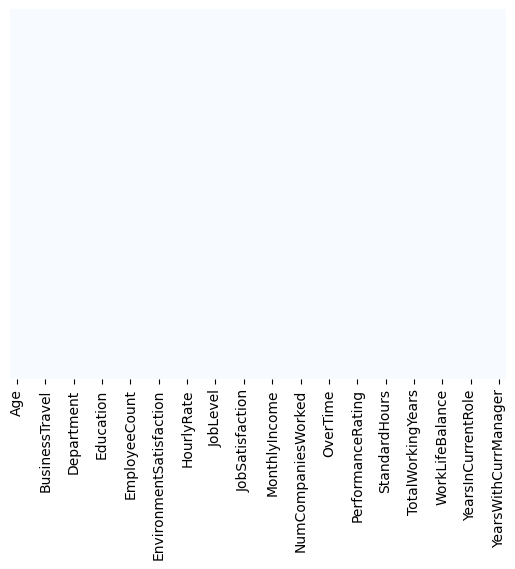

In [37]:
# Visualizing the NUll values
sns.heatmap(dataset.isnull(),yticklabels=False,cbar=False,cmap='Blues')

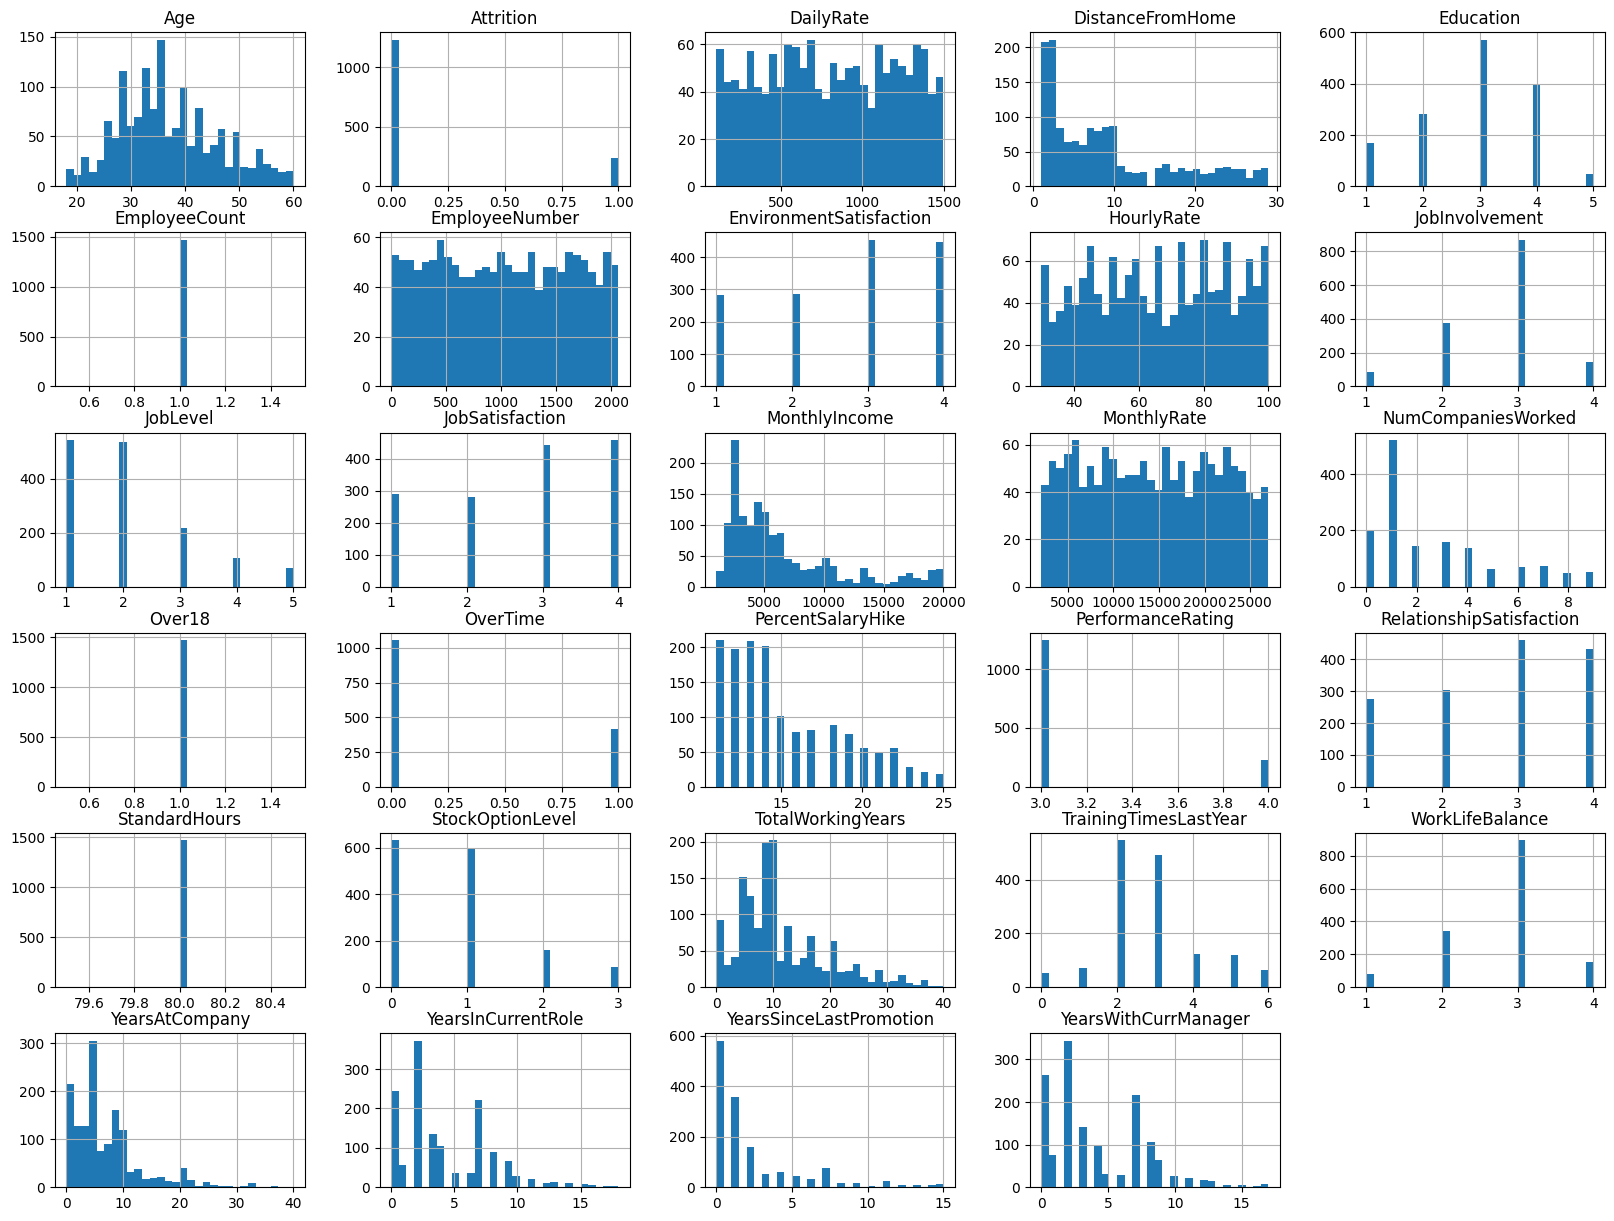

In [40]:
dataset.hist(bins=30,figsize=(20,15))
plt.show()

In [41]:
# Let's drop employee count , over18 and standard hours as there is no variablity in these features
dataset = dataset.drop(['EmployeeCount','Over18','StandardHours'],axis=1)

In [44]:
# Let's separate how many employees left the company and how many stayed
left_dataset = dataset[dataset['Attrition']==1]
stayed_dataset = dataset[dataset['Attrition']==0]

In [48]:
# Let's print the total employees, Number of employees left their percentage and Number of employees stay their percentage
print('Total = ', len(dataset))
print('Employees left = ', len(left_dataset))
print('Employees stayed = ', len(stayed_dataset))

Total =  1470
Employees left =  237
Employees stayed =  1233


In [49]:
left_dataset.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,237.000000,237.0,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,...,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000
mean,33.607595,1.0,750.362869,10.632911,2.839662,1010.345992,2.464135,65.573840,2.518987,1.637131,...,3.156118,2.599156,0.527426,8.244726,2.624473,2.658228,5.130802,2.902954,1.945148,2.852321
std,9.689350,0.0,401.899519,8.452525,1.008244,580.750572,1.169791,20.099958,0.773405,0.940594,...,0.363735,1.125437,0.856361,7.169204,1.254784,0.816453,5.949984,3.174827,3.153077,3.143349
min,18.000000,1.0,103.000000,1.000000,1.000000,1.000000,1.000000,31.000000,1.000000,1.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,1.0,408.000000,3.000000,2.000000,514.000000,1.000000,50.000000,2.000000,1.000000,...,3.000000,2.000000,0.000000,3.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000
50%,32.000000,1.0,699.000000,9.000000,3.000000,1017.000000,3.000000,66.000000,3.000000,1.000000,...,3.000000,3.000000,0.000000,7.000000,2.000000,3.000000,3.000000,2.000000,1.000000,2.000000
75%,39.000000,1.0,1092.000000,17.000000,4.000000,1486.000000,4.000000,84.000000,3.000000,2.000000,...,3.000000,4.000000,1.000000,10.000000,3.000000,3.000000,7.000000,4.000000,2.000000,5.000000
max,58.000000,1.0,1496.000000,29.000000,5.000000,2055.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,15.000000,15.000000,14.000000


In [50]:
stayed_dataset.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1233.000000,1233.0,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,...,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000
mean,37.561233,0.0,812.504461,8.915653,2.927007,1027.656123,2.771290,65.952149,2.770479,2.145985,...,3.153285,2.733982,0.845093,11.862936,2.832928,2.781022,7.369019,4.484185,2.234388,4.367397
std,8.888360,0.0,403.208379,8.012633,1.027002,606.217074,1.071132,20.380754,0.692050,1.117933,...,0.360408,1.071603,0.841985,7.760719,1.293585,0.681907,6.096298,3.649402,3.234762,3.594116
min,18.000000,0.0,102.000000,1.000000,1.000000,2.000000,1.000000,30.000000,1.000000,1.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,0.0,477.000000,2.000000,2.000000,483.000000,2.000000,48.000000,2.000000,1.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.0,817.000000,7.000000,3.000000,1022.000000,3.000000,66.000000,3.000000,2.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,6.000000,3.000000,1.000000,3.000000
75%,43.000000,0.0,1176.000000,13.000000,4.000000,1574.000000,4.000000,83.000000,3.000000,3.000000,...,3.000000,4.000000,1.000000,16.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000
max,60.000000,0.0,1499.000000,29.000000,5.000000,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,4.000000,3.000000,38.000000,6.000000,4.000000,37.000000,18.000000,15.000000,17.000000


1.The average age for the employee left is lower than employee stayed.

2.The employee with high dailyrate or salary is more likely to stay.

3.More the distance, more the possibility for the employee to left.

4.The employee who stayed has more StockOption level.

5.Total working years,Years at company and years with current manager also plays a role in employee stay in the company.

In [61]:
numerical_features = dataset.select_dtypes(include=['int64','float64'])

<Axes: >

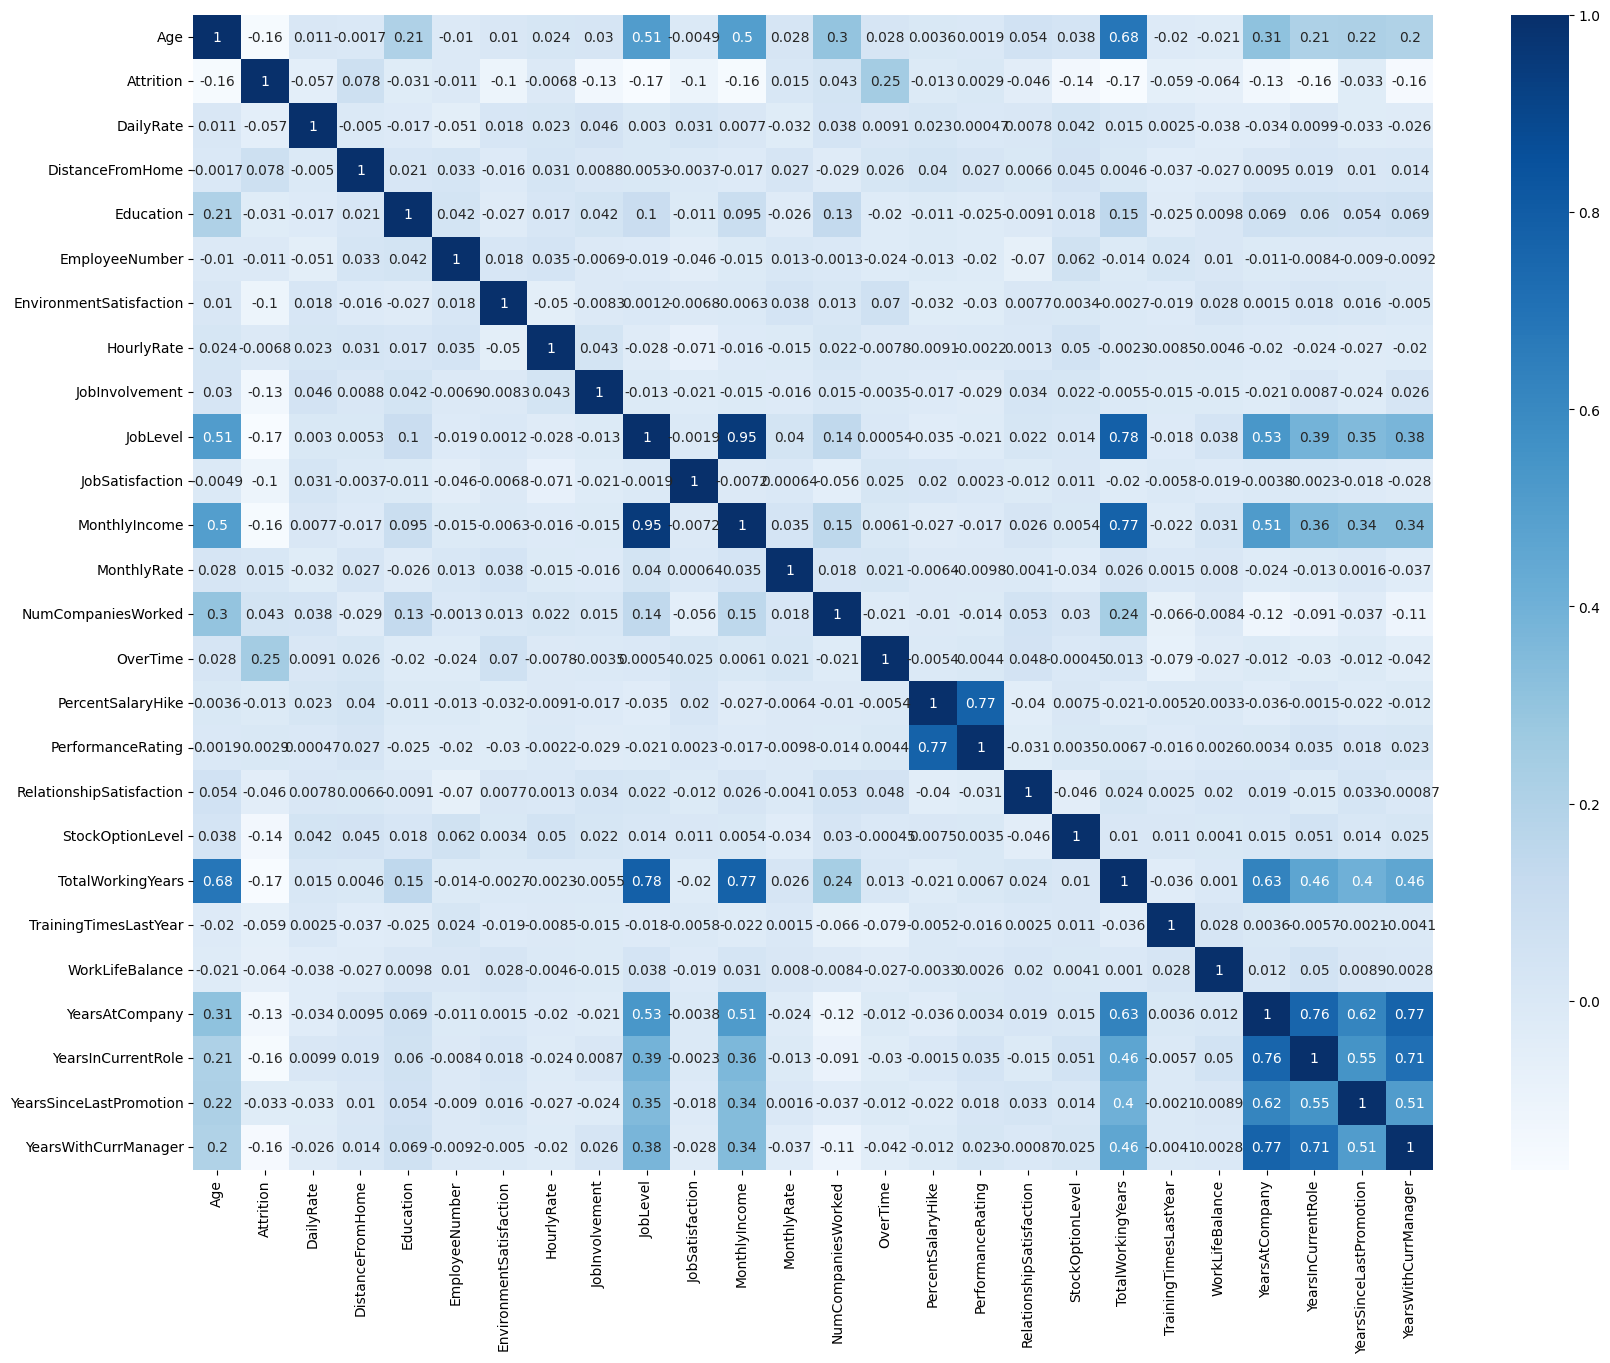

In [65]:
correlation = numerical_features.corr()
plt.subplots(figsize=(20,15))
sns.heatmap(correlation,annot=True,cmap='Blues')

*Monthly income is highly correlated with joblevel.

*JobLevel and Monthlyincome also has high correlation with TotalWorkingYrs.

*Yrswithcurrentrole and Yrswithcompany has a high correlation with Yrswithcurrentmanager.

*Also,performance rating and salary hike also has a high correlation.


<Axes: xlabel='Age', ylabel='count'>

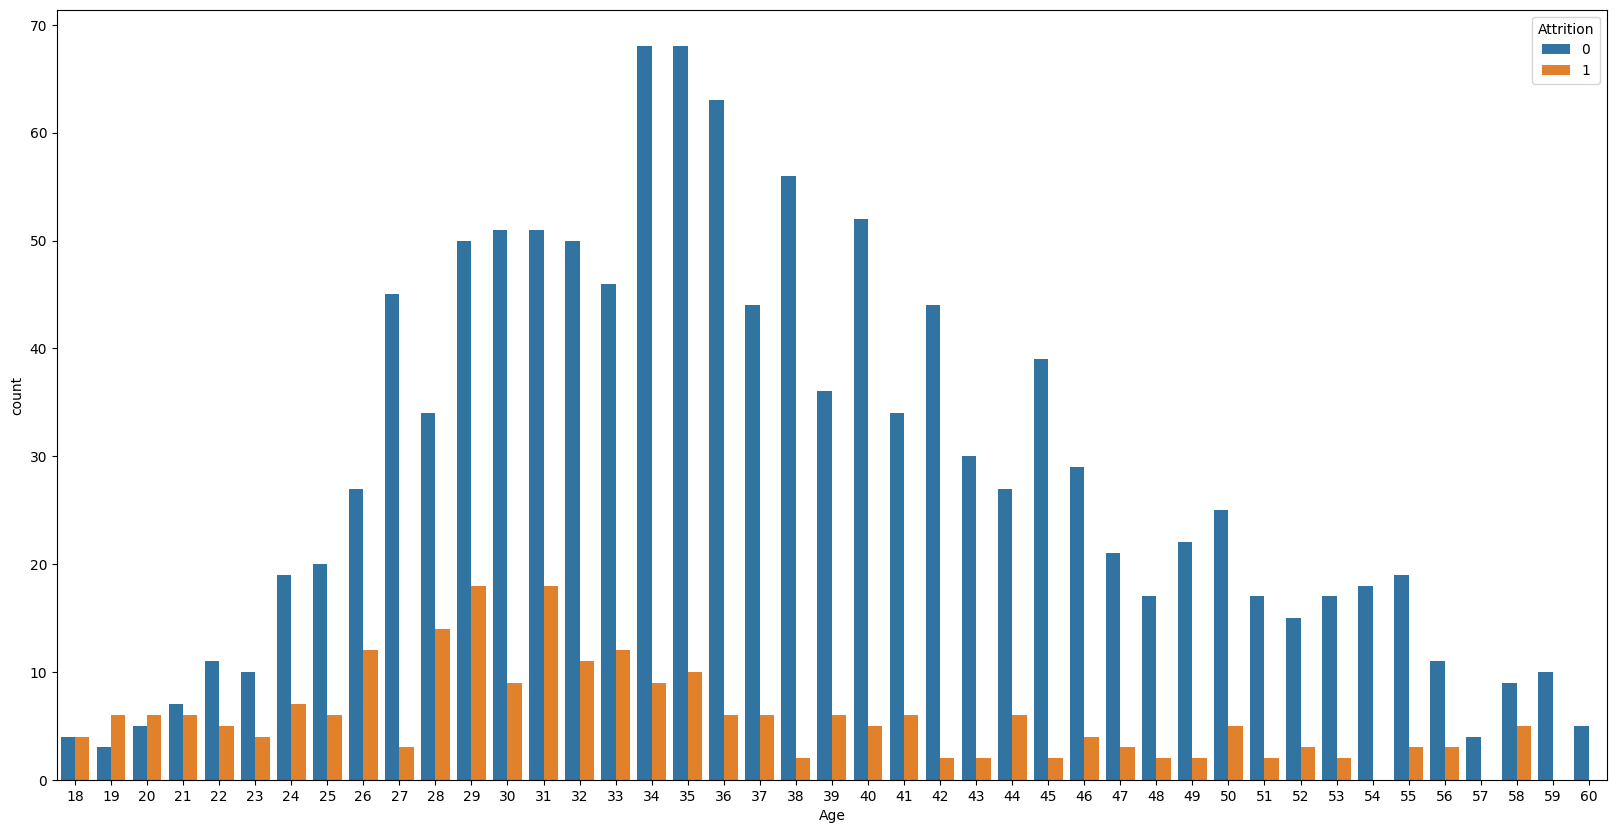

In [69]:
plt.figure(figsize=(20,10))
sns.countplot(x='Age',hue = 'Attrition', data=dataset)

<Axes: xlabel='JobRole', ylabel='count'>

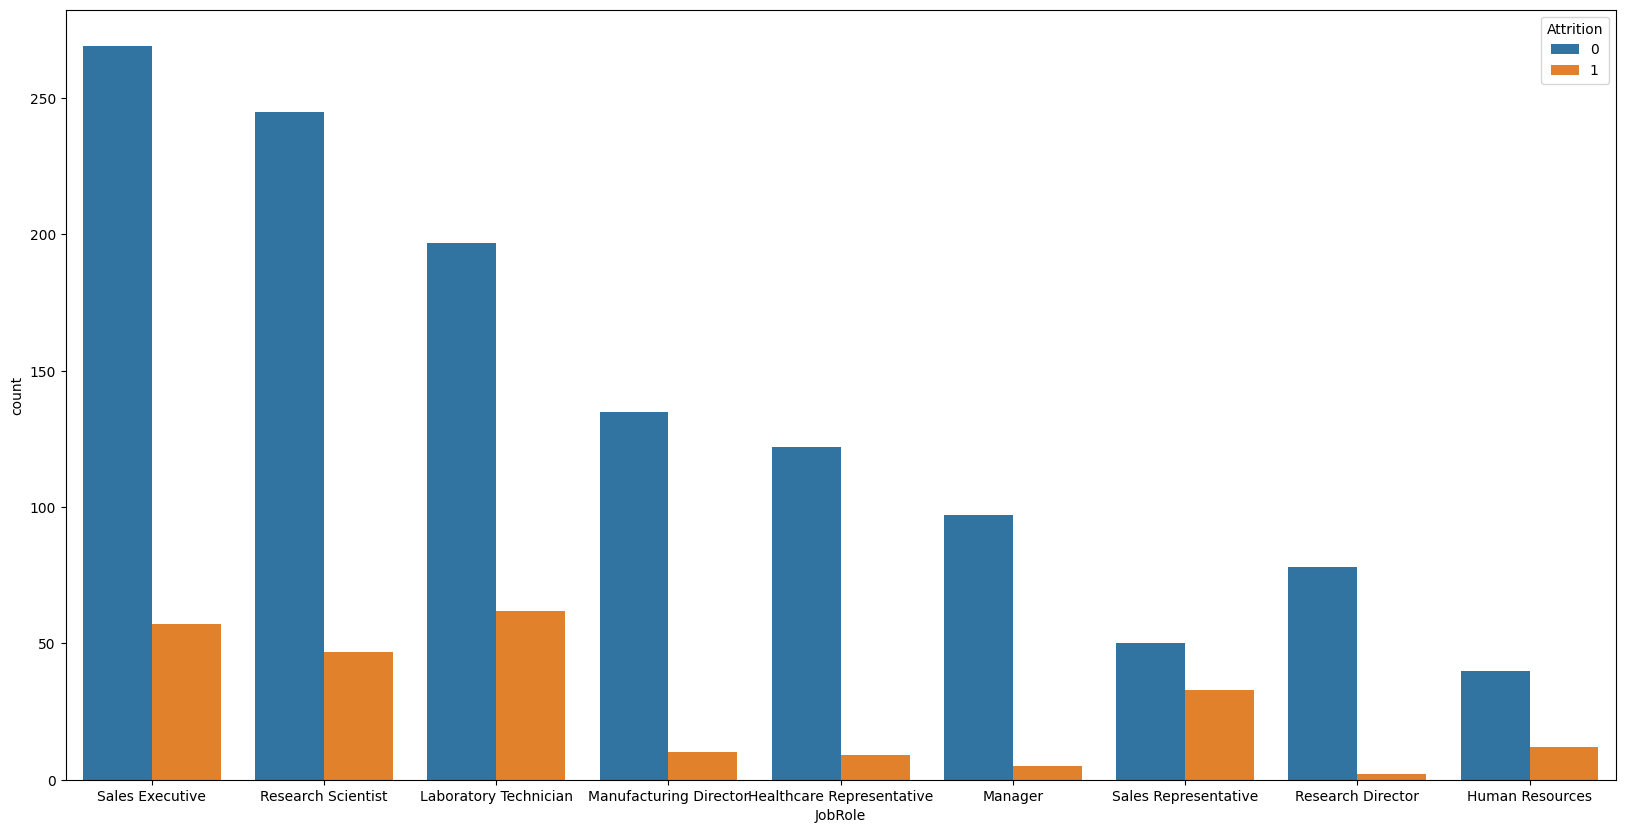

In [73]:
plt.figure(figsize=(20,10))
sns.countplot(x='JobRole',hue = 'Attrition', data=dataset)

<Axes: xlabel='MaritalStatus', ylabel='count'>

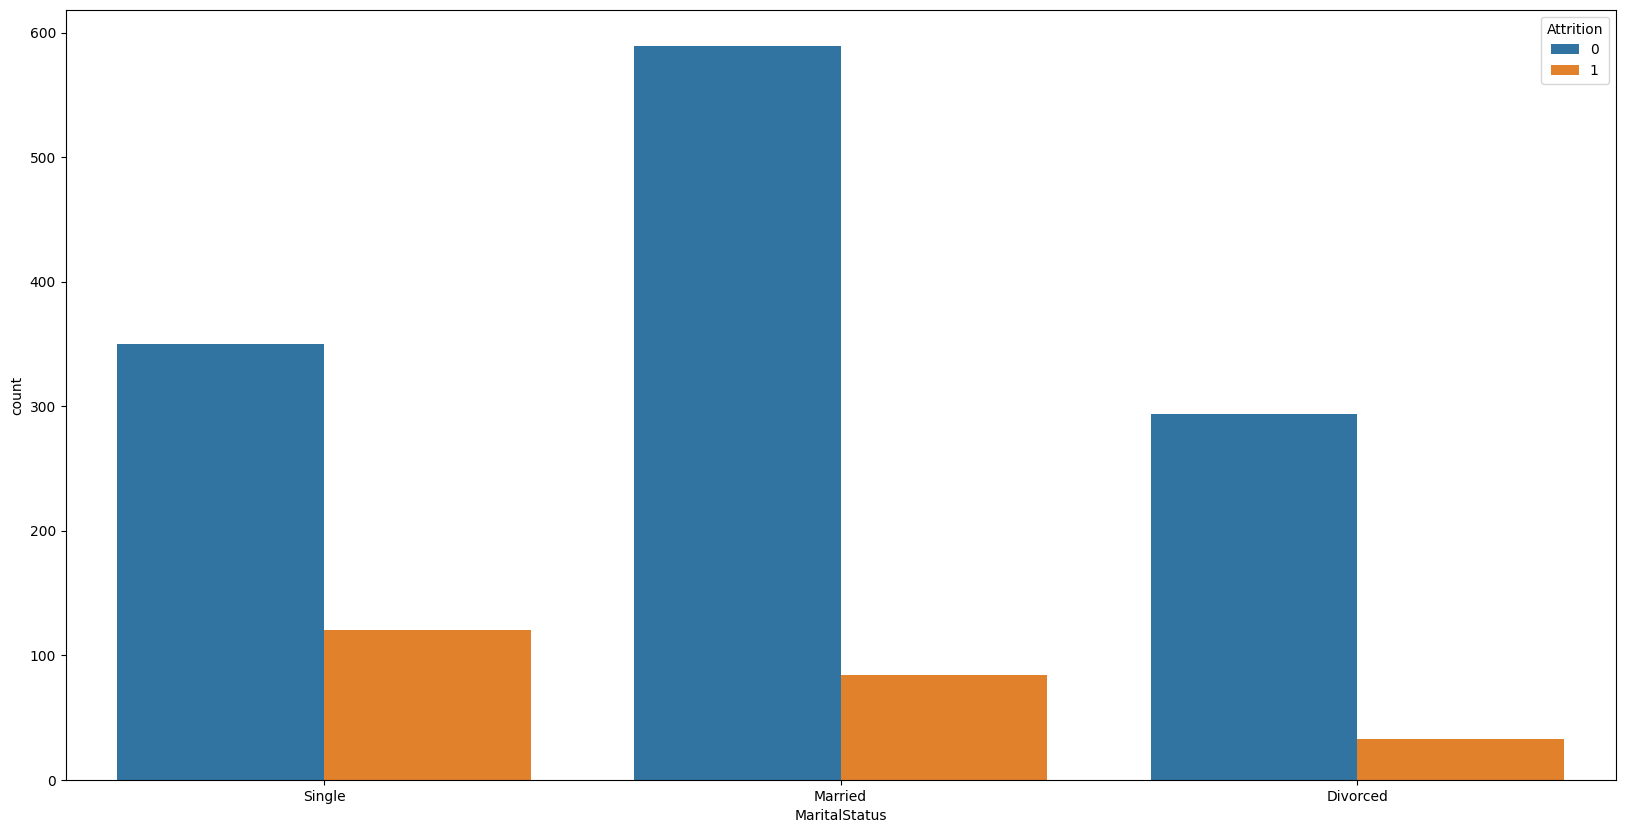

In [74]:
plt.figure(figsize=(20,10))
sns.countplot(x='MaritalStatus',hue = 'Attrition', data=dataset)

<Axes: xlabel='JobLevel', ylabel='count'>

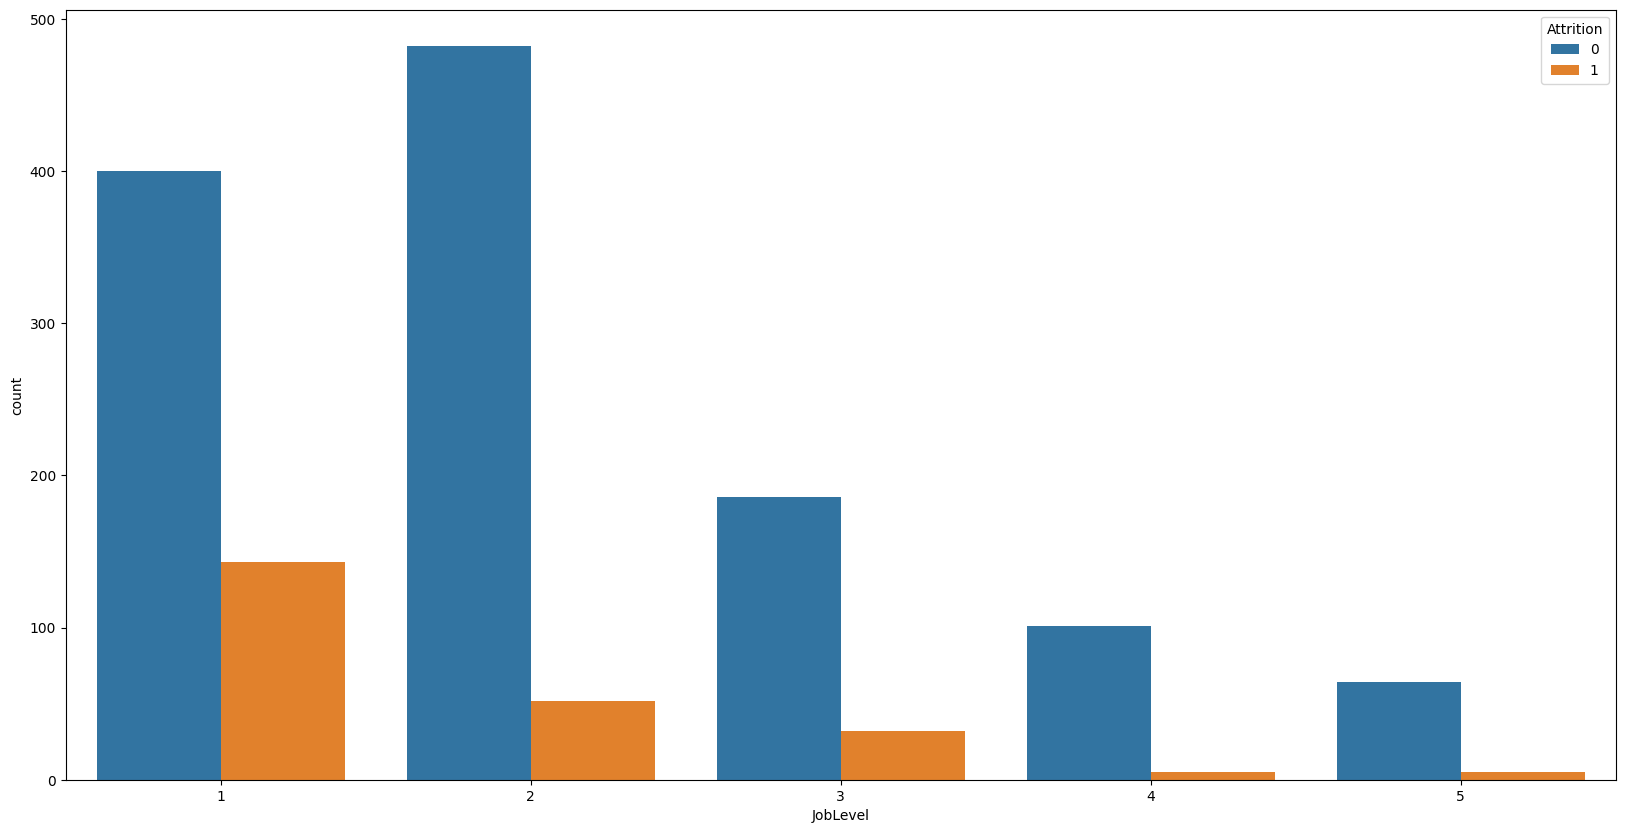

In [75]:
plt.figure(figsize=(20,10))
sns.countplot(x='JobLevel',hue = 'Attrition', data=dataset)

<Axes: xlabel='DistanceFromHome', ylabel='Density'>

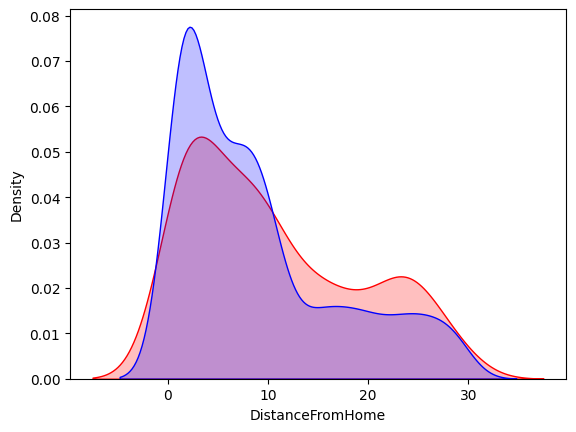

In [76]:
sns.kdeplot(left_dataset['DistanceFromHome'],label='Employees left',shade=True,color='r')
sns.kdeplot(stayed_dataset['DistanceFromHome'],label='Employees stayed',shade=True,color='b')

<Axes: xlabel='TotalWorkingYears', ylabel='Density'>

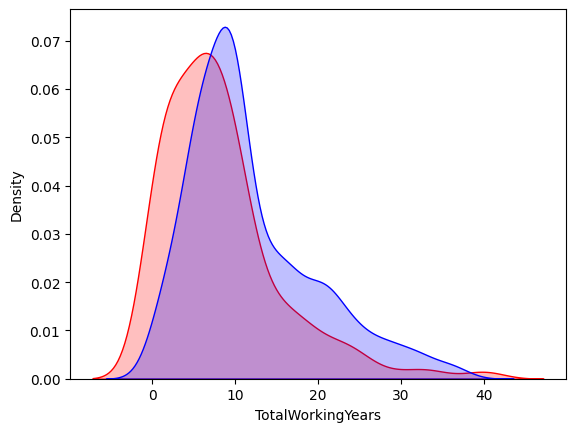

In [79]:
sns.kdeplot(left_dataset['TotalWorkingYears'],label='Employees left',shade=True,color='r')
sns.kdeplot(stayed_dataset['TotalWorkingYears'],label='Employees stayed',shade=True,color='b')

<Axes: xlabel='YearsWithCurrManager', ylabel='Density'>

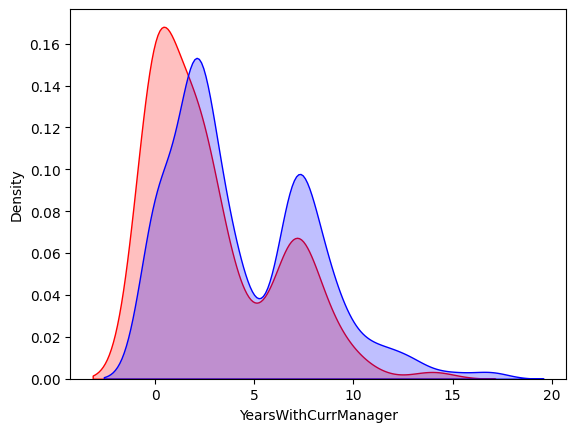

In [80]:
sns.kdeplot(left_dataset['YearsWithCurrManager'],label='Employees left',shade=True,color='r')
sns.kdeplot(stayed_dataset['YearsWithCurrManager'],label='Employees stayed',shade=True,color='b')

<Axes: xlabel='TotalWorkingYears', ylabel='Density'>

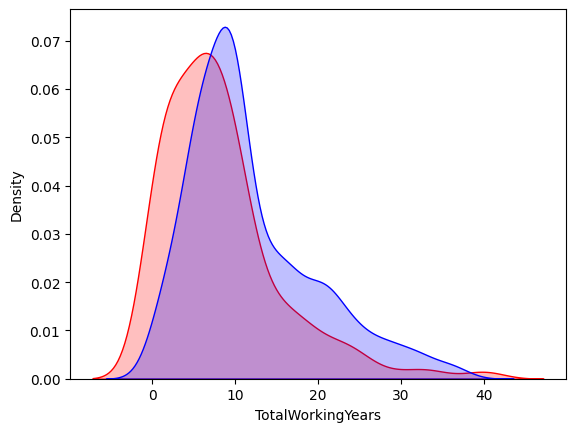

In [81]:
sns.kdeplot(left_dataset['TotalWorkingYears'],label='Employees left',shade=True,color='r')
sns.kdeplot(stayed_dataset['TotalWorkingYears'],label='Employees stayed',shade=True,color='b')

<Axes: xlabel='MonthlyIncome', ylabel='Gender'>

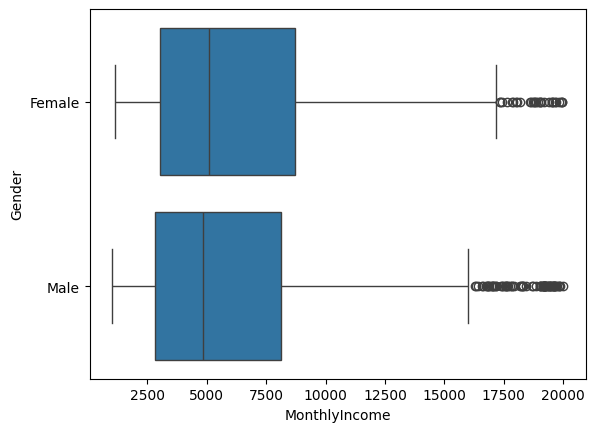

In [83]:
sns.boxplot(x='MonthlyIncome',y='Gender',data=dataset)

<Axes: xlabel='MonthlyIncome', ylabel='JobRole'>

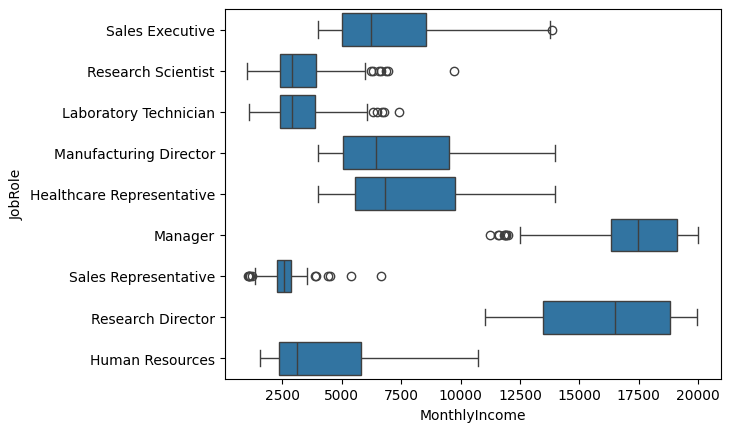

In [84]:
sns.boxplot(x='MonthlyIncome',y='JobRole',data=dataset)

# **Data Cleaning and splitting the train and test Data**

In [85]:
categorical_features = dataset.select_dtypes(include=['object'])

In [86]:
categorical_features

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus
0,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single
1,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married
2,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single
3,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married
4,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married
...,...,...,...,...,...,...
1465,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Married
1466,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married
1467,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married
1468,Travel_Frequently,Sales,Medical,Male,Sales Executive,Married


In [87]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()

In [88]:
categorical_features = encoder.fit_transform(categorical_features).toarray()

In [89]:
categorical_features = pd.DataFrame(categorical_features)

In [90]:
categorical_features

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1466,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1467,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1468,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [91]:
numerical_features

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,1102,1,2,1,2,94,3,2,...,3,1,0,8,0,1,6,4,0,5
1,49,0,279,8,1,2,3,61,2,2,...,4,4,1,10,3,3,10,7,1,7
2,37,1,1373,2,2,4,4,92,2,1,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1392,3,4,5,4,56,3,1,...,3,3,0,8,3,3,8,7,3,0
4,27,0,591,2,1,7,1,40,3,1,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,884,23,2,2061,3,41,4,2,...,3,3,1,17,3,3,5,2,0,3
1466,39,0,613,6,1,2062,4,42,2,3,...,3,1,1,9,5,3,7,7,1,7
1467,27,0,155,4,3,2064,2,87,4,2,...,4,2,1,6,0,3,6,2,0,3
1468,49,0,1023,2,3,2065,4,63,2,2,...,3,4,0,17,3,2,9,6,0,8


In [104]:
data = pd.concat([numerical_features,categorical_features],axis=1)

In [105]:
data.drop(['Attrition'],axis=1,inplace=True)

In [94]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [106]:
#convert data into array
data = np.array(data)

In [107]:
X = scaler.fit_transform(data)

In [114]:
X

array([[0.54761905, 0.71581961, 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.73809524, 0.12670007, 0.25      , ..., 0.        , 1.        ,
        0.        ],
       [0.45238095, 0.90980673, 0.03571429, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.21428571, 0.03793844, 0.10714286, ..., 0.        , 1.        ,
        0.        ],
       [0.73809524, 0.65926986, 0.03571429, ..., 0.        , 1.        ,
        0.        ],
       [0.38095238, 0.37652112, 0.25      , ..., 0.        , 1.        ,
        0.        ]])

In [109]:
Y = dataset['Attrition']

# **Train and Evaluate Logistic Regression Model**

In [111]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25,random_state=0)

In [112]:
X_train.shape

(1102, 51)

In [113]:
X_test.shape

(368, 51)

In [117]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

classifier = LogisticRegression(random_state=0)
classifier.fit(X_train,Y_train)

LogisticRegression(random_state=0)

In [118]:
y_pred = classifier.predict(X_test)

In [119]:
y_pred

array([0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,

In [123]:
from sklearn.metrics import confusion_matrix,classification_report

print("Accuracy -> ",accuracy_score(Y_test,y_pred)*100)
cm = confusion_matrix(Y_test,y_pred)

Accuracy ->  89.67391304347827


<Axes: >

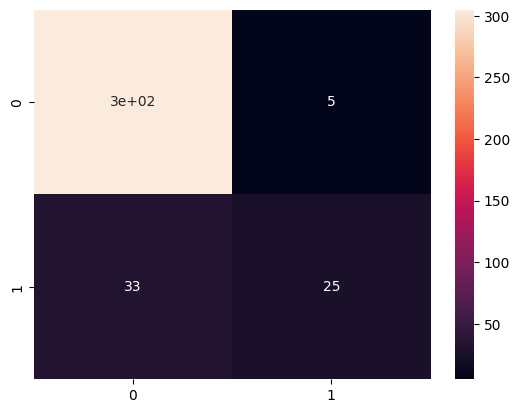

In [124]:
sns.heatmap(cm,annot=True)

In [125]:
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94       310
           1       0.83      0.43      0.57        58

    accuracy                           0.90       368
   macro avg       0.87      0.71      0.75       368
weighted avg       0.89      0.90      0.88       368



# **Train and Evaluate Random Forest Classifier**

In [128]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)
classifier.fit(X_train,Y_train)

y_pred = classifier.predict(X_test)

In [129]:
print("Accuracy -> ",accuracy_score(Y_test,y_pred)*100)
cm = confusion_matrix(Y_test,y_pred)

Accuracy ->  85.32608695652173


<Axes: >

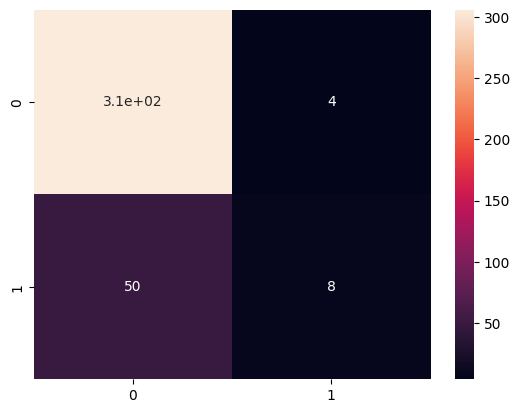

In [130]:
sns.heatmap(cm,annot=True)

In [131]:
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92       310
           1       0.67      0.14      0.23        58

    accuracy                           0.85       368
   macro avg       0.76      0.56      0.57       368
weighted avg       0.83      0.85      0.81       368



# **Train and Evaluate Deep Learning ANN Model**

In [132]:
import tensorflow as tf

In [138]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=16,activation='relu',input_shape = (51,)))
model.add(tf.keras.layers.Dense(units=16,activation='relu'))
model.add(tf.keras.layers.Dense(units=16,activation='relu'))
model.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

In [139]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 16)                832       
                                                                 
 dense_9 (Dense)             (None, 16)                272       
                                                                 
 dense_10 (Dense)            (None, 16)                272       
                                                                 
 dense_11 (Dense)            (None, 1)                 17        
                                                                 
Total params: 1393 (5.44 KB)
Trainable params: 1393 (5.44 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [140]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [141]:
epoch_hist = model.fit(X_train,Y_train,batch_size=10,epochs=100)

Epoch 1/100
111/111 [==============================] - 3s 7ms/step - loss: 0.5516 - accuracy: 0.7368
Epoch 2/100
111/111 [==============================] - 1s 7ms/step - loss: 0.4199 - accuracy: 0.8376
Epoch 3/100
111/111 [==============================] - 1s 8ms/step - loss: 0.3961 - accuracy: 0.8376
Epoch 4/100
111/111 [==============================] - 1s 8ms/step - loss: 0.3734 - accuracy: 0.8385
Epoch 5/100
111/111 [==============================] - 1s 7ms/step - loss: 0.3569 - accuracy: 0.8512
Epoch 6/100
111/111 [==============================] - 0s 4ms/step - loss: 0.3405 - accuracy: 0.8603
Epoch 7/100
111/111 [==============================] - 0s 4ms/step - loss: 0.3233 - accuracy: 0.8793
Epoch 8/100
111/111 [==============================] - 0s 4ms/step - loss: 0.3129 - accuracy: 0.8739
Epoch 9/100
111/111 [==============================] - 0s 4ms/step - loss: 0.2968 - accuracy: 0.8884
Epoch 10/100
111/111 [==============================] - 0s 3ms/step - loss: 0.2888 - accura

In [142]:
y_pred = model.predict(X_test)

12/12 [==============================] - 0s 4ms/step


In [143]:
y_pred = (y_pred > 0.5)

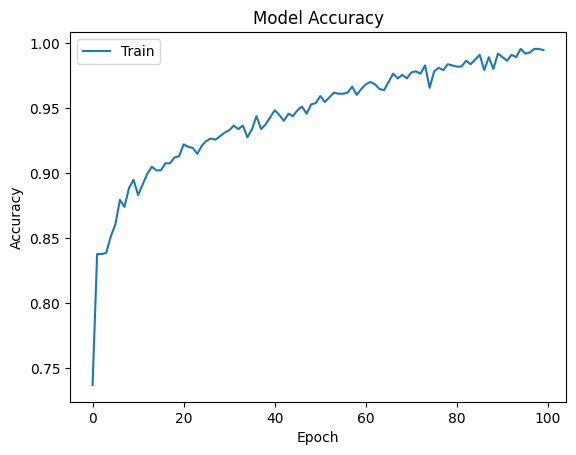

In [144]:
plt.plot(epoch_hist.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'],loc='upper left')
plt.show()

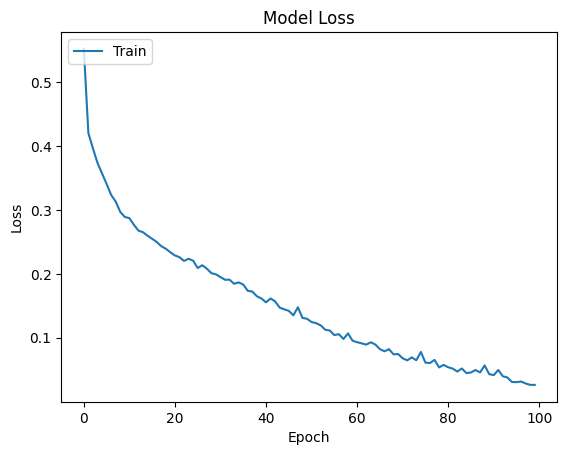

In [146]:
plt.plot(epoch_hist.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'],loc='upper left')
plt.show()

In [147]:
cm=  confusion_matrix(Y_test,y_pred)

<Axes: >

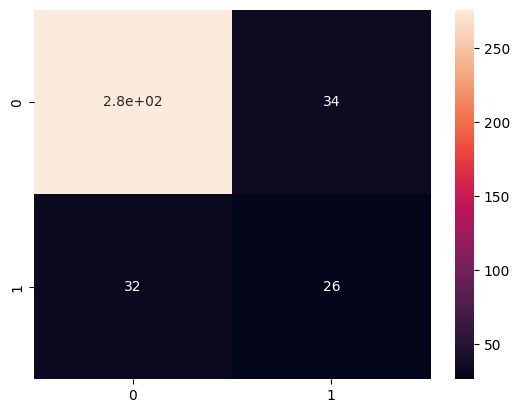

In [148]:
sns.heatmap(cm,annot=True)

In [149]:
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.89      0.89       310
           1       0.43      0.45      0.44        58

    accuracy                           0.82       368
   macro avg       0.66      0.67      0.67       368
weighted avg       0.82      0.82      0.82       368

